In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from typing import Tuple

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
data = pd.read_csv('../../Data/20x42_D66015.csv')
data.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,Not Verified,Source Verified,Verified,loan_status_bin
0,-1.617892,-0.159444,0.818226,-0.445124,-0.445124,-0.652128,-1.618351,-0.470515,0.027112,0.040613,0.258267,-0.984507,-0.48967,0.0,-0.132686,-0.212846,-0.636643,-0.352472,-0.152326,-0.058926,0.942809,-1.429022,-0.019978,-0.727393,-0.371208,0.936282,-0.208138,-0.321019,-0.732963,-0.257722,-0.11847,-0.198918,-0.225630,-0.208138,1.659291,-0.11847,-0.179284,1.212471,-0.738549,-0.565362,0.0
1,0.998307,-0.013596,-0.021126,-0.756603,-0.756603,1.344381,1.047605,0.368860,0.119291,-0.434052,-0.718750,-0.106351,-0.48967,0.0,-0.132686,-0.212846,-0.633592,3.160097,0.506178,-0.058926,0.942809,0.699779,-1.669549,-0.727393,-0.371208,0.936282,-0.208138,-0.321019,-0.732963,3.880149,-0.11847,-0.198918,-0.225630,-0.208138,-0.602667,-0.11847,-0.179284,-0.824762,1.354006,-0.565362,1.0
2,-0.496664,0.245284,0.616782,-0.445124,-0.445124,1.344381,-0.463143,-0.680359,-1.079039,1.434940,1.718384,-0.984507,-0.48967,0.0,-0.132686,-0.212846,-0.416120,-0.352472,2.749971,-0.058926,0.942809,0.699779,-0.294906,-0.727393,2.693908,-1.068055,-0.208138,-0.321019,-0.732963,-0.257722,-0.11847,-0.198918,-0.225630,-0.208138,1.659291,-0.11847,-0.179284,-0.824762,-0.738549,1.768777,0.0
3,0.998307,0.022866,0.668434,0.177834,0.177834,1.344381,1.047605,1.627924,0.764545,2.552955,0.492606,-0.984507,-0.48967,0.0,-0.132686,-0.212846,1.170891,-0.352472,-0.725469,-0.058926,-1.060660,0.699779,-0.294906,1.374773,-0.371208,-1.068055,-0.208138,-0.321019,-0.732963,-0.257722,-0.11847,-0.198918,4.432026,-0.208138,-0.602667,-0.11847,-0.179284,-0.824762,1.354006,-0.565362,0.0
4,0.848810,-0.183363,1.081653,-0.445124,-0.445124,1.344381,0.896590,1.627924,2.055053,-0.406225,-0.686303,0.771805,-0.48967,0.0,-0.132686,0.491336,0.123990,-0.352472,-0.152326,-0.058926,0.942809,0.699779,-1.669549,-0.727393,2.693908,-1.068055,-0.208138,-0.321019,1.364326,-0.257722,-0.11847,-0.198918,-0.225630,-0.208138,-0.602667,-0.11847,-0.179284,-0.824762,-0.738549,1.768777,1.0


In [4]:
data.shape

(289, 41)

In [5]:
data.loan_status_bin.value_counts()
#0 = Defaulted Loans
#1 = Loans Paid In Full

1.0    255
0.0     34
Name: loan_status_bin, dtype: int64

In [6]:
X = data[['loan_amnt', 'annual_inc', 'dti']]
X.shape

(289, 3)

In [7]:
y = data['loan_status_bin']

In [8]:
lr1 = LogisticRegression()

In [9]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)

In [10]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.87931034 0.87931034 0.87931034 0.87931034 0.89473684]
0.8823956442831216


In [11]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[  0,  34],
       [  0, 255]])

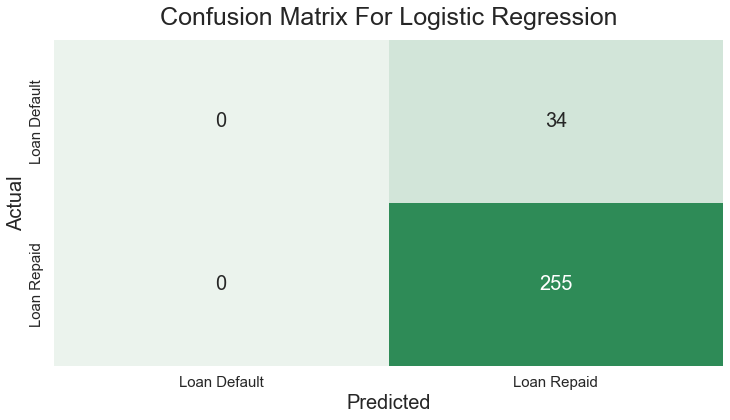

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [13]:
accuracy_score(y, y_pred)

0.8823529411764706

In [14]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

255
34
0
0
0.8823529411764706


In [15]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Defaulted
#1 = Loan Fully Paid

good_loan = data.loan_status_bin.value_counts()[1]
bad_loan = data.loan_status_bin.value_counts()[0]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment would give us 59% chance of pickkng a good loan

1.0    255
0.0     34
Name: loan_status_bin, dtype: int64

0.8823529411764706


In [16]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 3% better than Null Model or "random investment"
TP / (TP+FP)

0.8823529411764706

In [17]:
#Obtain predicted probabilities (not predicted classes) from RSKF: 
y_pred_prob = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [18]:
y_pred_prob

array([[0.08384524, 0.91615476],
       [0.11274295, 0.88725705],
       [0.09890256, 0.90109744],
       [0.123039  , 0.876961  ],
       [0.12750621, 0.87249379],
       [0.12930039, 0.87069961],
       [0.12217371, 0.87782629],
       [0.12271753, 0.87728247],
       [0.12840942, 0.87159058],
       [0.16258152, 0.83741848],
       [0.1140945 , 0.8859055 ],
       [0.12002191, 0.87997809],
       [0.07425375, 0.92574625],
       [0.10192421, 0.89807579],
       [0.12725369, 0.87274631],
       [0.13176332, 0.86823668],
       [0.10058627, 0.89941373],
       [0.11866673, 0.88133327],
       [0.12173996, 0.87826004],
       [0.11214107, 0.88785893],
       [0.11606971, 0.88393029],
       [0.16251208, 0.83748792],
       [0.13350441, 0.86649559],
       [0.09399358, 0.90600642],
       [0.12893412, 0.87106588],
       [0.13841609, 0.86158391],
       [0.11935225, 0.88064775],
       [0.11102782, 0.88897218],
       [0.11264484, 0.88735516],
       [0.11784432, 0.88215568],
       [0.

In [19]:
#Obtaining classification based on desired threshold of 0.8: 

y_pred_success = (y_pred_prob[:, 1] > 0.8).astype('float')
y_pred_success

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [20]:
conf_mat = confusion_matrix(y, y_pred_success)
conf_mat

array([[  0,  34],
       [  0, 255]])

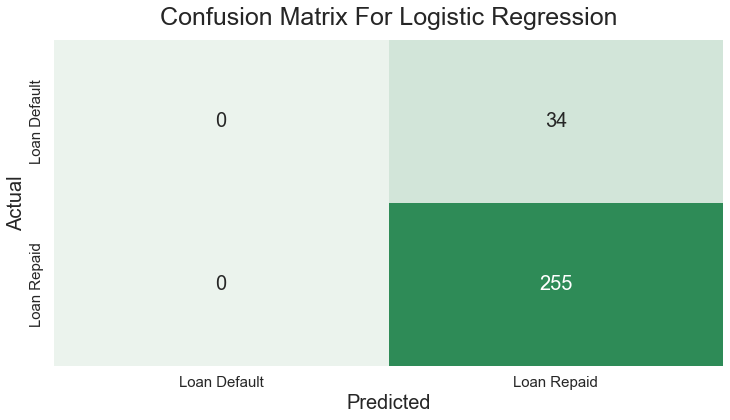

In [21]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [24]:
accuracy_score(y, y_pred_success)

0.6920415224913494

In [25]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

197
31
58
3
0.6920415224913494


In [26]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 3% better than Null Model or "random investment"
TP / (TP+FP)

0.8640350877192983

In [ ]:
## Next question. what was characteristic of the 217 loans that defaulted??
## Get all loans which you predicted greater than 80% and find out which ones defaulted.
## Any pattern?????

In [ ]:
#Do we drop all observations where the source is not verified? 
#Do we drop all observations loan amount is greater than half of one's income? 